# **NLP Topic Modelling on Description for the content based system**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive

/content/gdrive/My Drive


In [ ]:
# Dataframe
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

**Importing meta_book dataset for nlp topic modelling on description of book**

In [ ]:
goodreads_book1 = pd.read_excel('nlp_dataset.xlsx')

In [ ]:
goodreads_book1.shape

(24015, 15)

In [ ]:
#pip install --upgrade gensim

     |████████████████████████████████| 24.2MB 168kB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
goodreads_book1.columns

Index(['Unnamed: 0', 'book_id', 'text_reviews_count', 'average_rating',
       'description', 'link', 'url', 'image_url', 'ratings_count', 'title',
       'title_without_series', 'language', 'author_id', 'author_name',
       'genres_book'],
      dtype='object')

In [ ]:
goodreads_book1=goodreads_book1.drop(['Unnamed: 0'],axis=1)

In [ ]:
goodreads_book1.columns

Index(['book_id', 'text_reviews_count', 'average_rating', 'description',
       'link', 'url', 'image_url', 'ratings_count', 'title',
       'title_without_series', 'language', 'author_id', 'author_name',
       'genres_book'],
      dtype='object')

In [ ]:
goodreads_book2= goodreads_book1.reset_index(drop=True)

In [ ]:
# group data by title, genre and author name to join description in the same book
grouped_data = goodreads_book2.groupby(['book_id','title','genres_book','author_name'])['description'].apply(lambda x: ' '.join(x)).reset_index()

In [ ]:
grouped_data

,book_id,title,genres_book,author_name,description
0,228,Cockfighter,fiction,Charles Willeford,The sport is cockfighting and Frank Mansfield ...
1,420,The Year of Magical Thinking,non-fiction,Joan Didion,"From one of America's most iconic writers, a s..."
2,422,A Book of Common Prayer,fiction,Joan Didion,Writing with the telegraphic swiftness and mic...
3,423,Where I Was From,non-fiction,Joan Didion,"In her moving and insightful new book, Joan Di..."
4,428,Play It as It Lays,fiction,Joan Didion,A ruthless dissection of American life in the ...
...,...,...,...,...,...
24010,36393393,"Adrenaline Secrets (Deadly DNA, #1)",romance,Carolyn Reilly,"He's a trained, genetically-engineered mercena..."
24011,36434372,Ace's Gamble,romance,Natasha Spencer,She's taking a chance and he's risking it all....
24012,36438554,The Long Ride from Singapore: Two Surgeons on ...,non-fiction,Philip Iau,About the Book\nThey had all come with a breas...
24013,36460950,Accidental Daddy: A Billionaire's Baby Romance,romance,R.R. Banks,She gave me her innocence. I gave her a baby.\...


In [ ]:
#pip install nameparser


In [ ]:
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
#grouped_data['personnames_string'] = [','.join(map(str, l)) for l in grouped_data['personnames']]
#grouped_data['final_description'] = [a.replace(b, '').strip() for a, b in zip(grouped_data['description'], grouped_data['personnames_string'])]
#print (grouped_data)

In [ ]:
import nltk
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Book Description Exploration**

In [ ]:
grouped_data['stopwords'] = grouped_data['description'].apply(lambda x: len([x for x in x.split() if x in stop]))
grouped_data[['description','stopwords']].head()

,description,stopwords
0,The sport is cockfighting and Frank Mansfield ...,23
1,"From one of America's most iconic writers, a s...",19
2,Writing with the telegraphic swiftness and mic...,45
3,"In her moving and insightful new book, Joan Di...",43
4,A ruthless dissection of American life in the ...,44


In [ ]:
# Calculating the word count for book description
grouped_data['word_count'] = grouped_data['description'].apply(lambda x: len(str(x).split()))

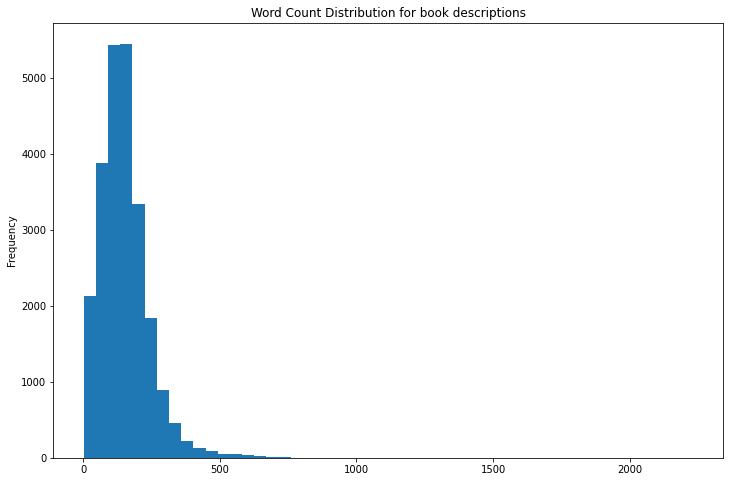

In [ ]:
grouped_data['word_count'].plot(
    kind='hist',
    bins = 50,
    figsize = (12,8),title='Word Count Distribution for book descriptions')

In [ ]:
#!pip install textblob

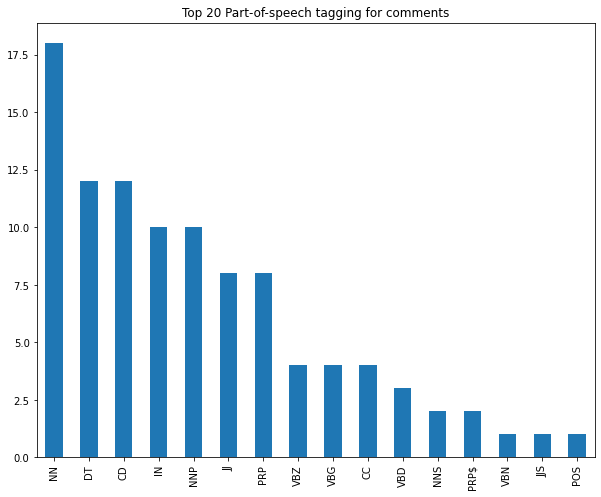

In [ ]:
from textblob import TextBlob
blob = TextBlob(str(grouped_data['description']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:25]
pos_df.plot(kind = 'bar', figsize=(10, 8), title = "Top 20 Part-of-speech tagging for comments")

**Bigram using tf-idf**

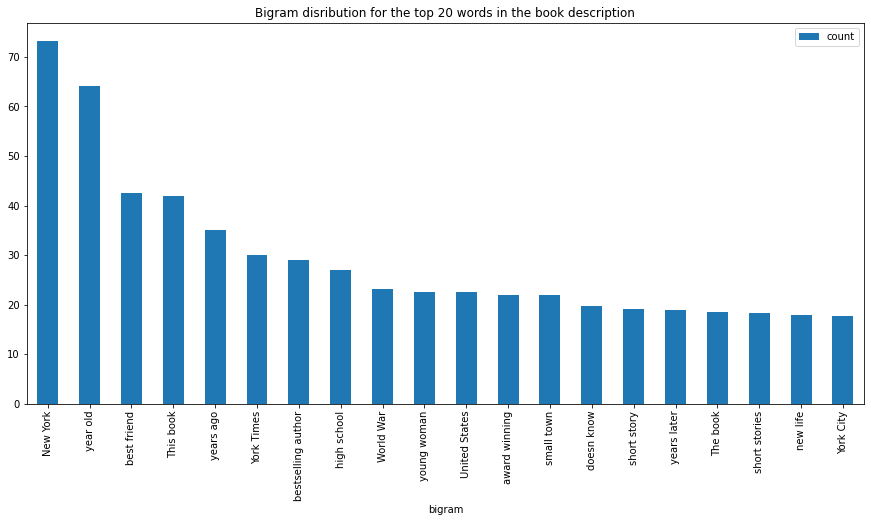

In [ ]:
#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(grouped_data['description'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(20)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the book description", figsize = (15,7), )

**Trigram using tf-idf**

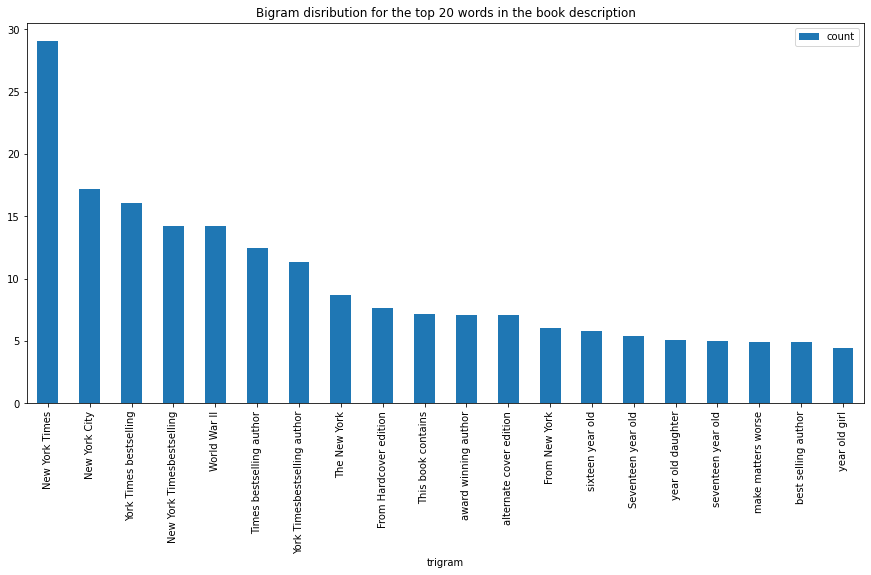

In [ ]:
#Converting text descriptions into vectors using TF-IDF using Trigram
tf = TfidfVectorizer(ngram_range=(3, 3), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(grouped_data['description'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)#converting into dataframe 
trigram = pd.DataFrame(freq)
trigram.rename(columns = {0:'trigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
trigram = trigram.head(20)

#Plotting the trigramn distribution
trigram.plot(x ='trigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the book description", figsize = (15,7), )

**Preprocessing**


1. Removing nonascii, punctuation, html, converting to lower case,   removing stop words
2. Extracting Human names from the description
3. Lematizing and tokenization



In [ ]:
# Function for removing NonAscii characters
def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)

# Function for removing punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

# Function for removing the html tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)


In [ ]:
grouped_data['cleaned_desc'] = grouped_data['description'].apply(_removeNonAscii)
grouped_data['cleaned_desc'] = grouped_data['cleaned_desc'].apply(remove_punctuation)
grouped_data['cleaned_desc'] = grouped_data['cleaned_desc'].apply(remove_html)

In [ ]:
grouped_data.head()

,book_id,title,genres_book,author_name,description,stopwords,word_count,cleaned_desc
0,228,Cockfighter,fiction,Charles Willeford,The sport is cockfighting and Frank Mansfield ...,23,69,The sport is cockfighting and Frank Mansfield ...
1,420,The Year of Magical Thinking,non-fiction,Joan Didion,"From one of America's most iconic writers, a s...",19,50,From one of America s most iconic writers a st...
2,422,A Book of Common Prayer,fiction,Joan Didion,Writing with the telegraphic swiftness and mic...,45,114,Writing with the telegraphic swiftness and mic...
3,423,Where I Was From,non-fiction,Joan Didion,"In her moving and insightful new book, Joan Di...",43,120,In her moving and insightful new book Joan Did...
4,428,Play It as It Lays,fiction,Joan Didion,A ruthless dissection of American life in the ...,44,103,A ruthless dissection of American life in the ...


In [ ]:
# Extracting and removing names of people from the description as it shows irrelevance in topic model
from nameparser.parser import HumanName

def get_human_names(text):
    tokens = nltk.tokenize.word_tokenize(text)
    pos = nltk.pos_tag(tokens)
    sentt = nltk.ne_chunk(pos, binary = False)
    person_list = []
    person = []
    name = ""
    for subtree in sentt.subtrees(filter=lambda t: t.label() == 'PERSON'):
        for leaf in subtree.leaves():
            person.append(leaf[0])
        if len(person) > 1: #avoid grabbing lone surnames
            for part in person:
                name += part + ' '
            if name[:-1] not in person_list:
                person_list.append(name[:-1])
            name = ''
        person = []

    return (person_list)

In [ ]:
grouped_data['personnames'] = grouped_data['cleaned_desc'].apply(get_human_names)
#grouped_data2 = pd.read_excel('goodreads_english.xlsx')

In [ ]:
grouped_data.head(10)

,book_id,title,genres_book,author_name,description,stopwords,word_count,cleaned_desc,personnames
0,228,Cockfighter,fiction,Charles Willeford,The sport is cockfighting and Frank Mansfield ...,23,69,The sport is cockfighting and Frank Mansfield ...,"[Frank Mansfield, Hoke Moseley, Charles Willef..."
1,420,The Year of Magical Thinking,non-fiction,Joan Didion,"From one of America's most iconic writers, a s...",19,50,From one of America s most iconic writers a st...,[Joan Didion]
2,422,A Book of Common Prayer,fiction,Joan Didion,Writing with the telegraphic swiftness and mic...,45,114,Writing with the telegraphic swiftness and mic...,"[Joan Didion, Boca Grande Grace Strasser Menda..."
3,423,Where I Was From,non-fiction,Joan Didion,"In her moving and insightful new book, Joan Di...",43,120,In her moving and insightful new book Joan Did...,"[Joan Didion, Fromexplores California]"
4,428,Play It as It Lays,fiction,Joan Didion,A ruthless dissection of American life in the ...,44,103,A ruthless dissection of American life in the ...,[]
5,1902,In the Land of White Death: An Epic Story of S...,non-fiction,Valerian Albanov,"In 1912, six months after Robert Falcon Scott ...",90,281,In 1912 six months after Robert Falcon Scott a...,"[Robert Falcon Scott, Valerian Albanov, Kara S..."
6,2050,"Farewell, My Lovely (Philip Marlowe, #2)",mystery,Raymond Chandler,Marlowe's about to give up on a completely rou...,27,52,Marlowe s about to give up on a completely rou...,[]
7,2054,"The Long Goodbye (Philip Marlowe, #6)",mystery,Raymond Chandler,Marlowe befriends a down on his luck war veter...,28,55,Marlowe befriends a down on his luck war veter...,[Terry Lennox]
8,2056,An Evening of Long Goodbyes,fiction,Paul Murray,Charles Hythloday observes the world from the ...,39,96,Charles Hythloday observes the world from the ...,[]
9,2058,Ghost In the Shell 2: Innocence (Novel-Hard Co...,fiction,Masaki Yamada,"Part man, but mostly machine, Batou is the tou...",60,172,Part man but mostly machine Batou is the tough...,[Masaki Yamada]


In [ ]:
def removepname(text,names):
  namesplit=[w for segments in names for w in segments.split()]
  querywords = text.split()
  resultwords  = [word for word in querywords if word not in namesplit]
  result = ' '.join(resultwords)
  return result

In [ ]:
grouped_data['cleaned'] = grouped_data.apply(lambda x: removepname(x['cleaned_desc'], x['personnames']), axis=1)

In [ ]:
grouped_data

,book_id,title,genres_book,author_name,description,stopwords,word_count,cleaned_desc,personnames,cleaned
0,228,Cockfighter,fiction,Charles Willeford,The sport is cockfighting and Frank Mansfield ...,23,69,The sport is cockfighting and Frank Mansfield ...,"[Frank Mansfield, Hoke Moseley, Charles Willef...",The sport is cockfighting and is the cockfight...
1,420,The Year of Magical Thinking,non-fiction,Joan Didion,"From one of America's most iconic writers, a s...",19,50,From one of America s most iconic writers a st...,[Joan Didion],From one of America s most iconic writers a st...
2,422,A Book of Common Prayer,fiction,Joan Didion,Writing with the telegraphic swiftness and mic...,45,114,Writing with the telegraphic swiftness and mic...,"[Joan Didion, Boca Grande Grace Strasser Menda...",Writing with the telegraphic swiftness and mic...
3,423,Where I Was From,non-fiction,Joan Didion,"In her moving and insightful new book, Joan Di...",43,120,In her moving and insightful new book Joan Did...,"[Joan Didion, Fromexplores California]",In her moving and insightful new book reassess...
4,428,Play It as It Lays,fiction,Joan Didion,A ruthless dissection of American life in the ...,44,103,A ruthless dissection of American life in the ...,[],A ruthless dissection of American life in the ...
...,...,...,...,...,...,...,...,...,...,...
24010,36393393,"Adrenaline Secrets (Deadly DNA, #1)",romance,Carolyn Reilly,"He's a trained, genetically-engineered mercena...",83,195,He s a trained genetically engineered mercenar...,"[Jake Hanson, Kendra Reed Jake, Kendra Reed]",He s a trained genetically engineered mercenar...
24011,36434372,Ace's Gamble,romance,Natasha Spencer,She's taking a chance and he's risking it all....,56,154,She s taking a chance and he s risking it all ...,[],She s taking a chance and he s risking it all ...
24012,36438554,The Long Ride from Singapore: Two Surgeons on ...,non-fiction,Philip Iau,About the Book\nThey had all come with a breas...,106,293,About the Book They had all come with a breast...,"[Philip Iau, Mikael Hartman, Breast Cancer, Cl...",About the Book They had all come with a breast...
24013,36460950,Accidental Daddy: A Billionaire's Baby Romance,romance,R.R. Banks,She gave me her innocence. I gave her a baby.\...,55,144,She gave me her innocence I gave her a baby As...,[],She gave me her innocence I gave her a baby As...


In [ ]:
grouped_data['cleaned_desc'][1]

'From one of America s most iconic writers a stunning book of electric honesty and passion Joan Didion explores an intensely personal yet universal experience a portrait of a marriage and a life in good times and bad that will speak to anyone who has ever loved a husband or wife or child'

In [ ]:
grouped_data['cleaned'][1]

'From one of America s most iconic writers a stunning book of electric honesty and passion explores an intensely personal yet universal experience a portrait of a marriage and a life in good times and bad that will speak to anyone who has ever loved a husband or wife or child'

In [ ]:
# Function for converting into lower case
def make_lower_case(text):
   return text.lower()

# Function for removing stop words
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    stoplist2=['say', 'get', 'go', 'know', 'may', 'need', 'like', 'make','http' ,'see', 'want','www','come', 'take', 'use', 'would', 'can','novel','one', 'mr', 'york', 'image', 'year', 'book','new','bestselling','new york' 'author', 'caption', 'also', 'copyright', 'something','story','edition','reader','content','series']
    text = [w for w in text if not w in stops]
    text = [w for w in text if not w in stoplist2]
    text = " ".join(text)
    return text

grouped_data['cleaned'] = grouped_data['cleaned'].apply(make_lower_case)
grouped_data['cleaned'] = grouped_data['cleaned'].apply(remove_stop_words)

In [ ]:
grouped_data.head(5)

,book_id,title,genres_book,author_name,description,stopwords,word_count,cleaned_desc,personnames,cleaned
0,228,Cockfighter,fiction,Charles Willeford,The sport is cockfighting and Frank Mansfield ...,23,69,The sport is cockfighting and Frank Mansfield ...,"[Frank Mansfield, Hoke Moseley, Charles Willef...",sport cockfighting cockfighter silent fiercely...
1,420,The Year of Magical Thinking,non-fiction,Joan Didion,"From one of America's most iconic writers, a s...",19,50,From one of America s most iconic writers a st...,[Joan Didion],america iconic writers stunning electric hones...
2,422,A Book of Common Prayer,fiction,Joan Didion,Writing with the telegraphic swiftness and mic...,45,114,Writing with the telegraphic swiftness and mic...,"[Joan Didion, Boca Grande Grace Strasser Menda...",writing telegraphic swiftness microscopic sens...
3,423,Where I Was From,non-fiction,Joan Didion,"In her moving and insightful new book, Joan Di...",43,120,In her moving and insightful new book Joan Did...,"[Joan Didion, Fromexplores California]",moving insightful reassesses parts life work h...
4,428,Play It as It Lays,fiction,Joan Didion,A ruthless dissection of American life in the ...,44,103,A ruthless dissection of American life in the ...,[],ruthless dissection american life late 1960s p...


In [ ]:
grouped_data.cleaned[1]

'america iconic writers stunning electric honesty passion explores intensely personal yet universal experience portrait marriage life good times bad speak anyone ever loved husband wife child'

In [ ]:
grouped_data2=grouped_data.drop(['stopwords','word_count','personnames'],axis=1)

In [ ]:
grouped_data2.columns

Index(['book_id', 'title', 'genres_book', 'author_name', 'description',
       'cleaned_desc', 'cleaned'],
      dtype='object')

In [ ]:
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from IPython.core.debugger import set_trace


In [ ]:
grouped_data2['tokenized'] = grouped_data2.cleaned.apply(word_tokenize)

In [ ]:
#nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
lemmatizer = WordNetLemmatizer()
grouped_data2['lemmatize'] = grouped_data2['tokenized'].apply(lambda x: [lemmatizer.lemmatize(cleaned) for cleaned in x])

In [ ]:
# tag words base on their part of speech
tagged_tokens=[]
for token in grouped_data2['lemmatize'].to_list():
    tagged_tokens.append(nltk.pos_tag(token))

In [ ]:
# only preserve words that are verb, noun or adjective
tag_list = []
for desc in tagged_tokens:
    tag_list.append([(word,tag) for word, tag in desc if tag.startswith('NN') or tag.startswith('VB') or tag.startswith('JJ')])

In [ ]:
word_list = []
for desc in tag_list:
    word_list.append([word for word, tag in desc])

In [ ]:
grouped_data2['processed'] = [' '.join(desc) for desc in word_list]

In [ ]:
grouped_data2.head(5)

,book_id,title,genres_book,author_name,description,cleaned_desc,cleaned,tokenized,lemmatize,processed
0,228,Cockfighter,fiction,Charles Willeford,The sport is cockfighting and Frank Mansfield ...,The sport is cockfighting and Frank Mansfield ...,sport cockfighting cockfighter silent fiercely...,"[sport, cockfighting, cockfighter, silent, fie...","[sport, cockfighting, cockfighter, silent, fie...",sport cockfighting cockfighter silent contrary...
1,420,The Year of Magical Thinking,non-fiction,Joan Didion,"From one of America's most iconic writers, a s...",From one of America s most iconic writers a st...,america iconic writers stunning electric hones...,"[america, iconic, writers, stunning, electric,...","[america, iconic, writer, stunning, electric, ...",america iconic writer stunning electric honest...
2,422,A Book of Common Prayer,fiction,Joan Didion,Writing with the telegraphic swiftness and mic...,Writing with the telegraphic swiftness and mic...,writing telegraphic swiftness microscopic sens...,"[writing, telegraphic, swiftness, microscopic,...","[writing, telegraphic, swiftness, microscopic,...",writing telegraphic swiftness microscopic sens...
3,423,Where I Was From,non-fiction,Joan Didion,"In her moving and insightful new book, Joan Di...",In her moving and insightful new book Joan Did...,moving insightful reassesses parts life work h...,"[moving, insightful, reassesses, parts, life, ...","[moving, insightful, reassesses, part, life, w...",moving insightful reassesses part life work hi...
4,428,Play It as It Lays,fiction,Joan Didion,A ruthless dissection of American life in the ...,A ruthless dissection of American life in the ...,ruthless dissection american life late 1960s p...,"[ruthless, dissection, american, life, late, 1...","[ruthless, dissection, american, life, late, 1...",ruthless dissection american life play layscap...


In [ ]:
#pip install xlsxwriter
#import xlsxwriter

     |████████████████████████████████| 153kB 5.5MB/s 


In [ ]:
stop = set(stopwords.words('english'))

def process(text):
    # only preserve words that have three or more characters
    text_filt = re.findall(r'\b[a-zA-Z]{3,}\b', text)
    
    words_filt = [w for w in text_filt if w not in stop]
    return words_filt

grouped_data2['dictionary'] = grouped_data2['processed'].apply(process)
print(grouped_data2.dictionary)

0        [sport, cockfighting, cockfighter, silent, con...
1        [america, iconic, writer, stunning, electric, ...
2        [writing, telegraphic, swiftness, microscopic,...
3        [moving, insightful, reassesses, part, life, w...
4        [ruthless, dissection, american, life, play, l...
                               ...                        
24010    [trained, engineered, mercenary, spy, looking,...
24011    [taking, chance, risking, christie, spent, who...
24012    [breast, lump, mammogram, discovered, cancer, ...
24013    [gave, innocence, gave, baby, billionaire, use...
24014                                    [part, way, life]
Name: dictionary, Length: 24015, dtype: object


# **Topic Modelling on LDA**


In [ ]:
#pip install pyLDAvis

In [ ]:
from gensim.parsing.preprocessing import remove_stopwords
import pyLDAvis.gensim as gensimvis
import pyLDAvis

In [ ]:
from gensim import corpora, models, similarities, matutils

In [ ]:
dictionary = corpora.Dictionary(grouped_data2.dictionary)

dictionary.save('dictionary.dict')

In [ ]:
dictionary = corpora.Dictionary.load('dictionary.dict')

In [ ]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in grouped_data2.dictionary]
corpora.MmCorpus.serialize('corpus.mm', doc_term_matrix)

In [ ]:
#Taking 20 topics for the model
seed = 123
Lda = models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics=20, id2word = dictionary, passes=10, random_state = seed)

In [ ]:
topics=ldamodel.print_topics()

In [ ]:
topics

[(0,
  '0.021*"natural" + 0.020*"place" + 0.020*"love" + 0.019*"others" + 0.019*"violence" + 0.019*"human" + 0.019*"many" + 0.019*"play" + 0.019*"education" + 0.018*"hand"'),
 (1,
  '0.025*"author" + 0.022*"story" + 0.015*"life" + 0.014*"character" + 0.012*"tale" + 0.012*"read" + 0.011*"writer" + 0.011*"reader" + 0.011*"book" + 0.010*"time"'),
 (2,
  '0.009*"life" + 0.008*"help" + 0.008*"way" + 0.008*"cupcake" + 0.007*"food" + 0.007*"time" + 0.006*"people" + 0.006*"everything" + 0.005*"work" + 0.005*"reader"'),
 (3,
  '0.044*"politics" + 0.043*"kit" + 0.038*"scandal" + 0.033*"challenge" + 0.030*"many" + 0.025*"bed" + 0.025*"steel" + 0.025*"rivalry" + 0.024*"capital" + 0.024*"regain"'),
 (4,
  '0.069*"tame" + 0.047*"flying" + 0.036*"alpha" + 0.035*"boxing" + 0.030*"test" + 0.026*"horse" + 0.012*"pilot" + 0.010*"cozy" + 0.009*"crew" + 0.009*"battlefield"'),
 (5,
  '0.053*"pool" + 0.050*"fade" + 0.016*"jewish" + 0.016*"fling" + 0.012*"fairytale" + 0.011*"lion" + 0.011*"apocalypse" + 0.011

In [ ]:
cleaned_topics=[]
cnt=0
for i in topics:
  res1 = " ".join(re.findall("[a-zA-Z]+", i[1]))
  cleaned_topics.append((cnt,res1))
  cnt+=1 

In [ ]:
df = pd.DataFrame(cleaned_topics, columns =['topic', 'topicname']) 

In [ ]:
df

,topic,topicname
0,0,natural place love others violence human many ...
1,1,author story life character tale read writer r...
2,2,life help way cupcake food time people everyth...
3,3,politics kit scandal challenge many bed steel ...
4,4,tame flying alpha boxing test horse pilot cozy...
5,5,pool fade jewish fling fairytale lion apocalyp...
6,6,god fighting factor singapore contract great j...
7,7,world secret life death find time monster myst...
8,8,game history world journalism first ruining st...
9,9,life thing find time want dream job way chance...


**pyLDAvis Visualisation**

In [ ]:
d = corpora.Dictionary.load('dictionary.dict')
c = corpora.MmCorpus('corpus.mm')

In [ ]:
pyLDAvis.enable_notebook()
vis_data = gensimvis.prepare(ldamodel, c, d)
pyLDAvis.display(vis_data)

In [ ]:
count_vectorizer = CountVectorizer(ngram_range=(1,1),stop_words='english',token_pattern='\\b[a-z][a-z][a-z]+\\b')
count_vectorizer.fit(grouped_data2.processed)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='\\b[a-z][a-z][a-z]+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
# Create the term-document matrix
# Transpose it so the terms are the rows
doc_word = count_vectorizer.transform(grouped_data2.processed).transpose()

In [ ]:
# convert sparse matrix to genism corpus
corpus = matutils.Sparse2Corpus(doc_word)

In [ ]:
# tranform doc from word space to the topic space (like transform in sklearn)
lda_corpus = ldamodel[corpus]

In [ ]:
lda_corpus

In [ ]:
lda_docs = [doc for doc in lda_corpus]

In [ ]:
#lda_docs[6]

In [ ]:
corpus

In [ ]:
listoftopics=[]
for i in corpus:
  var=ldamodel[i]
  var1=sorted(var,key=lambda x:(-x[1],x[0]))
  listoftopics.append(var1[0][0]) #highest probability topics applied


In [ ]:
grouped_data2['topic']=listoftopics

In [ ]:
grouped_data2.head(5)

,book_id,title,genres_book,author_name,description,cleaned_desc,cleaned,tokenized,lemmatize,processed,dictionary,topic
0,228,Cockfighter,fiction,Charles Willeford,The sport is cockfighting and Frank Mansfield ...,The sport is cockfighting and Frank Mansfield ...,sport cockfighting cockfighter silent fiercely...,"[sport, cockfighting, cockfighter, silent, fie...","[sport, cockfighting, cockfighter, silent, fie...",sport cockfighting cockfighter silent contrary...,"[sport, cockfighting, cockfighter, silent, con...",13
1,420,The Year of Magical Thinking,non-fiction,Joan Didion,"From one of America's most iconic writers, a s...",From one of America s most iconic writers a st...,america iconic writers stunning electric hones...,"[america, iconic, writers, stunning, electric,...","[america, iconic, writer, stunning, electric, ...",america iconic writer stunning electric honest...,"[america, iconic, writer, stunning, electric, ...",7
2,422,A Book of Common Prayer,fiction,Joan Didion,Writing with the telegraphic swiftness and mic...,Writing with the telegraphic swiftness and mic...,writing telegraphic swiftness microscopic sens...,"[writing, telegraphic, swiftness, microscopic,...","[writing, telegraphic, swiftness, microscopic,...",writing telegraphic swiftness microscopic sens...,"[writing, telegraphic, swiftness, microscopic,...",8
3,423,Where I Was From,non-fiction,Joan Didion,"In her moving and insightful new book, Joan Di...",In her moving and insightful new book Joan Did...,moving insightful reassesses parts life work h...,"[moving, insightful, reassesses, parts, life, ...","[moving, insightful, reassesses, part, life, w...",moving insightful reassesses part life work hi...,"[moving, insightful, reassesses, part, life, w...",2
4,428,Play It as It Lays,fiction,Joan Didion,A ruthless dissection of American life in the ...,A ruthless dissection of American life in the ...,ruthless dissection american life late 1960s p...,"[ruthless, dissection, american, life, late, 1...","[ruthless, dissection, american, life, late, 1...",ruthless dissection american life play layscap...,"[ruthless, dissection, american, life, play, l...",8


In [ ]:
final_goodreads=pd.merge(grouped_data2, df, on='topic', how='left')

In [ ]:
# Using this table on topic for the content based recommendation 
final_goodreads.head(4)

,book_id,title,genres_book,author_name,description,cleaned_desc,cleaned,tokenized,lemmatize,processed,dictionary,topic,topicname
0,228,Cockfighter,fiction,Charles Willeford,The sport is cockfighting and Frank Mansfield ...,The sport is cockfighting and Frank Mansfield ...,sport cockfighting cockfighter silent fiercely...,"[sport, cockfighting, cockfighter, silent, fie...","[sport, cockfighting, cockfighter, silent, fie...",sport cockfighting cockfighter silent contrary...,"[sport, cockfighting, cockfighter, silent, con...",13,investor property holmes roller quit danny exi...
1,420,The Year of Magical Thinking,non-fiction,Joan Didion,"From one of America's most iconic writers, a s...",From one of America s most iconic writers a st...,america iconic writers stunning electric hones...,"[america, iconic, writers, stunning, electric,...","[america, iconic, writer, stunning, electric, ...",america iconic writer stunning electric honest...,"[america, iconic, writer, stunning, electric, ...",7,world secret life death find time monster myst...
2,422,A Book of Common Prayer,fiction,Joan Didion,Writing with the telegraphic swiftness and mic...,Writing with the telegraphic swiftness and mic...,writing telegraphic swiftness microscopic sens...,"[writing, telegraphic, swiftness, microscopic,...","[writing, telegraphic, swiftness, microscopic,...",writing telegraphic swiftness microscopic sens...,"[writing, telegraphic, swiftness, microscopic,...",8,game history world journalism first ruining st...
3,423,Where I Was From,non-fiction,Joan Didion,"In her moving and insightful new book, Joan Di...",In her moving and insightful new book Joan Did...,moving insightful reassesses parts life work h...,"[moving, insightful, reassesses, parts, life, ...","[moving, insightful, reassesses, part, life, w...",moving insightful reassesses part life work hi...,"[moving, insightful, reassesses, part, life, w...",2,life help way cupcake food time people everyth...


In [ ]:
df1= final_goodreads[['book_id','processed','topicname']]
df1

In [ ]:
hybrid=pd.merge(goodreads_book2, df1 ,on='book_id', how='left')

In [ ]:
hybrid

,book_id,text_reviews_count,average_rating,description,link,url,image_url,ratings_count,title,title_without_series,language,author_id,author_name,genres_book,processed,topicname
0,19398490,2311,4.31,Winner of the Pulitzer Prize\nFrom the highly ...,https://www.goodreads.com/book/show/19398490-a...,https://www.goodreads.com/book/show/19398490-a...,https://images.gr-assets.com/books/1440903901m...,53342,All the Light We Cannot See,All the Light We Cannot See,en,28186,Anthony Doerr,fiction,winner pulitzer prize acclaimed multiple award...,life thing find time want dream job way chance...
1,12969594,241,4.06,An alternate cover of this ASIN can be found ...,https://www.goodreads.com/book/show/12969594-t...,https://www.goodreads.com/book/show/12969594-t...,https://images.gr-assets.com/books/1328309680m...,6390,The Orphan Master's Son,The Orphan Master's Son,en,36615,Adam Johnson,fiction,alternate cover asin found thrilling literary ...,world secret life death find time monster myst...
2,8664353,38878,4.39,"In her long-awaited new book, Laura Hillenbran...",https://www.goodreads.com/book/show/8664353-un...,https://www.goodreads.com/book/show/8664353-un...,https://images.gr-assets.com/books/1327861115m...,504961,"Unbroken: A World War II Story of Survival, Re...","Unbroken: A World War II Story of Survival, Re...",en,30913,Laura Hillenbrand,non-fiction,awaited writes rich vivid narrative voice disp...,game history world journalism first ruining st...
3,6452796,2930,3.95,Forget everything you thought you knew about h...,https://www.goodreads.com/book/show/6452796-drive,https://www.goodreads.com/book/show/6452796-drive,https://s.gr-assets.com/assets/nophoto/book/11...,58428,Drive: The Surprising Truth About What Motivat...,Drive: The Surprising Truth About What Motivat...,en,96150,Daniel H. Pink,non-fiction,forget everything thought knew motivate people...,life thing find time want dream job way chance...
4,178186,26,3.87,An autobiographical memoir revealing the tradi...,https://www.goodreads.com/book/show/178186.The...,https://www.goodreads.com/book/show/178186.The...,https://s.gr-assets.com/assets/nophoto/book/11...,245,The Worlds of a Maasai Warrior: An Autobiography,The Worlds of a Maasai Warrior: An Autobiography,en,103752,Tepilit Ole Saitoti,non-fiction,autobiographical memoir revealing traditional ...,life thing find time want dream job way chance...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24010,23228256,28,4.09,"From Brazil's most acclaimed young novelist, t...",https://www.goodreads.com/book/show/23228256-b...,https://www.goodreads.com/book/show/23228256-b...,https://images.gr-assets.com/books/1411183144m...,159,Blood-Drenched Beard,Blood-Drenched Beard,en,1169290,Daniel Galera,fiction,acclaimed young novelist mesmerizing troubled ...,world secret life death find time monster myst...
24011,30340824,45,4.33,Ten seconds can change everything.\nDaisy Conn...,https://www.goodreads.com/book/show/30340824-c...,https://www.goodreads.com/book/show/30340824-c...,https://images.gr-assets.com/books/1464920539m...,68,"Collateral Damage (Hidden Scars, #2)","Collateral Damage (Hidden Scars, #2)",en,3975855,A.M. Myers,romance,ten second change everything fell best friend ...,life help way cupcake food time people everyth...
24012,33125385,29,4.40,Librarian Note: Alternate Cover Edition for ....,https://www.goodreads.com/book/show/33125385-u...,https://www.goodreads.com/book/show/33125385-u...,https://images.gr-assets.com/books/1480090010m...,93,Untouched (Untouched #1),Untouched (Untouched #1),en,8577407,Lilly Wilde,romance,librarian note alternate cover untouched follo...,war country american history trauma national r...
24013,22798607,3,3.90,"In his debut collection, Christian Winn throws...",https://www.goodreads.com/book/show/22798607-n...,https://www.goodreads.com/book/show/22798607-n...,https://images.gr-assets.com/books/1417750817m...,21,Naked Me,Naked Me,en,8409842,Christian Winn,fiction,debut collection 

In [ ]:
topics = [ldamodel[corpus[i]] for i in range(len(grouped_data))]

In [ ]:
def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

topics_document_to_dataframe([(3, 0.13628773), (6, 0.19014739), (8, 0.07170159)], 20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,NaN,NaN,NaN,0.136288,NaN,NaN,0.190147,NaN,0.0717016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Like TF-IDF, create a matrix of topic weighting, with documents as rows and topics as columns
document_topic = pd.concat([topics_document_to_dataframe(topics_document, num_topics=20) for topics_document in topics]) .reset_index(drop=True).fillna(0)

In [ ]:
document_topic.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.150056,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.259085,0.000000,0.000000,0.000000,0.183105,0.293238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.012607,0.012607,0.012607,0.012607,0.012607,0.012607,0.012607,0.264152,0.012607,0.262228,0.012607,0.012607,0.012607,0.012607,0.012607,0.012607,0.259309,0.012607,0.012607,0.012607
2,0.000000,0.000000,0.077290,0.000000,0.000000,0.160686,0.000000,0.081397,0.234713,0.000000,0.160675,0.079999,0.000000,0.000000,0.076298,0.000000,0.000000,0.081854,0.000000,0.000000
3,0.000000,0.133995,0.314346,0.000000,0.000000,0.095583,0.000000,0.000000,0.000000,0.121090,0.000000,0.000000,0.000000,0.000000,0.095405,0.000000,0.175770,0.000000,0.000000,0.000000
4,0.191568,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.169937,0.195617,0.186931,0.000000,0.108945,0.000000,0.000000,0.000000,0.000000,0.000000,0.079684,0.000000,0.000000


In [ ]:
# Which document are about topic 8
document_topic.sort_values(8, ascending=False)[8].head(20)

1006     0.762166
3495     0.758995
19114    0.719903
979      0.683317
6505     0.683301
22714    0.683231
21744    0.683206
12237    0.683163
3159     0.682996
18101    0.682955
8996     0.682855
20049    0.682676
10761    0.681467
8045     0.679671
1661     0.679190
1662     0.679190
4693     0.676332
3165     0.674923
18340    0.633726
19433    0.625967
Name: 8, dtype: float64

**Heatmap visulisation on the topics shows that most of the books are related to topic 9**

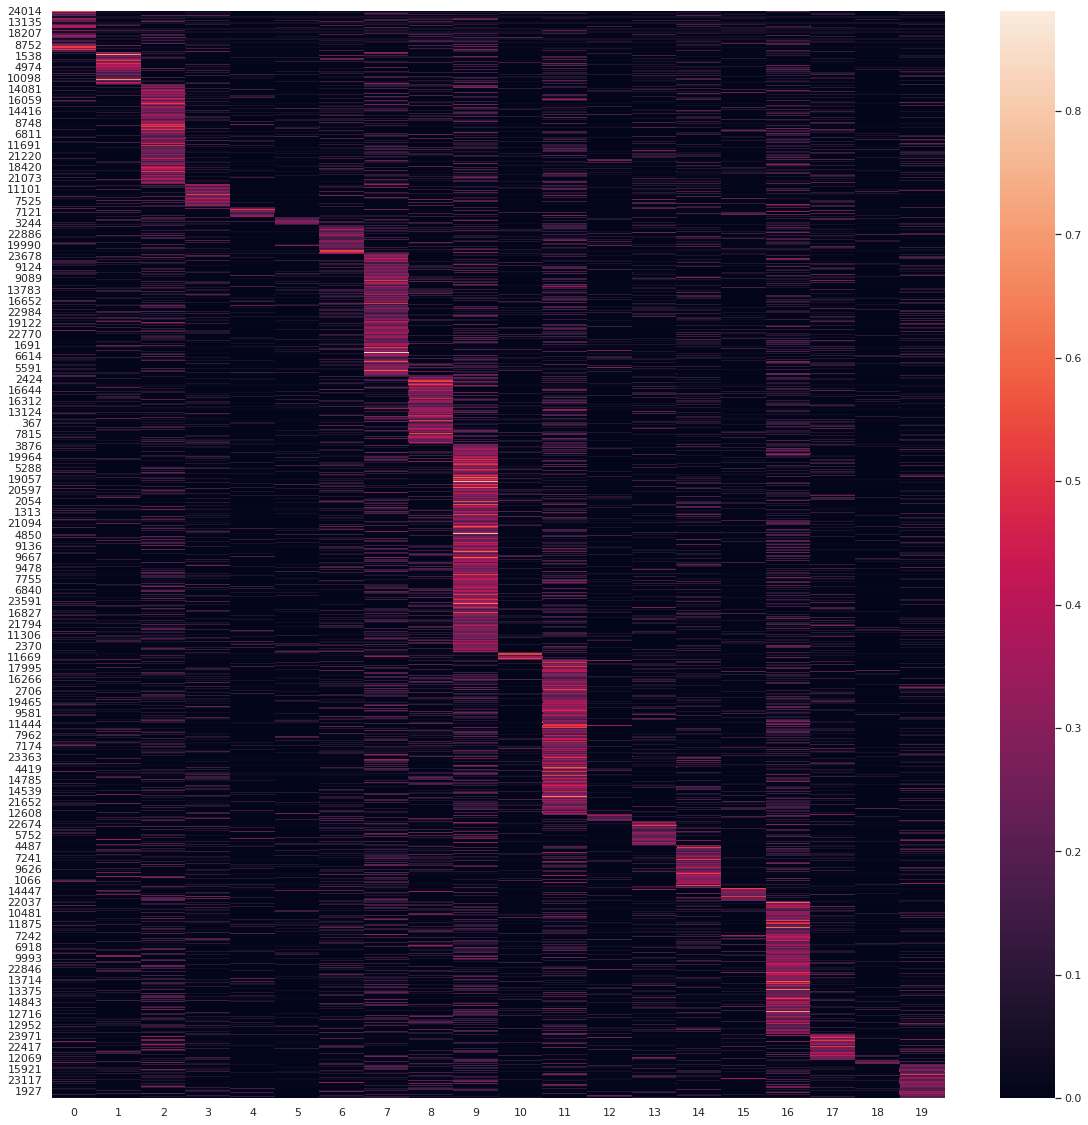

In [ ]:
%matplotlib inline
import seaborn as sns; sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(document_topic.loc[document_topic.idxmax(axis=1).sort_values().index])

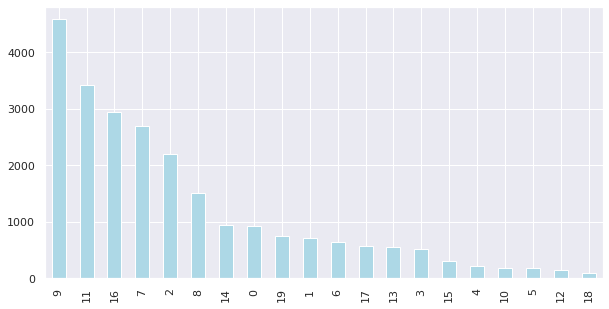

In [ ]:
#From the graph it can be seen that more than 4k books are related to topic 9 and least on topic 18
sns.set(rc={'figure.figsize':(10,5)})
document_topic.idxmax(axis=1).value_counts().plot.bar(color='lightblue')

In [1]:
#pip install xlsxwriter


In [ ]:
#import xlsxwriter
#writer = pd.ExcelWriter(r'hybrid_dataset.xlsx', engine='xlsxwriter',options={'strings_to_urls': False})
#hybrid.to_excel(writer)
#writer.close()